In [1]:
%matplotlib inline

In [2]:
import stream as st
import scanpy as sc
import matplotlib.pyplot as plt

import numpy  as np
import pandas as pd
import os

from src.core import *

/home/ye/anaconda3/envs/Stream/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


In [3]:
st.__version__

'0.4.1'

In [16]:
adata=read("./stream_result/vkh_BC/adata.h5ad",file_format="h5ad",workdir="stream_result/vkh_BC//")

Saving results in: stream_result/vkh_BC//


In [17]:
adata=adata.raw.to_adata()

In [18]:
add_cell_labels(adata,file_name="stream_result/vkh_BC/cell_label.tsv")
add_cell_colors(adata,file_name="stream_result/vkh_BC/cell_label_color.tsv")

In [19]:
adata

AnnData object with n_obs × n_vars = 13669 × 33421 
    obs: 'orig_cluster', 'km_cluster', 'idents', 'status', 'n_counts', 'leiden', 'louvain', 'label', 'label_color'
    var: 'gene_ids', 'feature_types'
    uns: 'HVG', 'leiden', 'leiden_sizes', 'louvain', 'neighbors', 'paga', 'path', 'pca', 'rank_genes_groups', 'umap', 'experiment', 'workdir', 'label_color'
    obsm: 'X_pca', 'X_tsne', 'X_umap'

In [20]:
st.filter_genes(adata)

ValueError: Length of values does not match length of index

In [22]:
select_top_principal_components(adata,n_pc=30,first_pc=True)

using all the genes ...


TypeError: PCA does not support sparse input. See TruncatedSVD for a possible alternative.

In [21]:
select_variable_genes(adata)

IndexError: tuple index out of range

In [ ]:
dimension_reduction(adata,n_neighbors=20,n_components=2,n_jobs=8,method="se",feature="top_pcs")

feature top_pcs is being used ...
8 cpus are being used ...


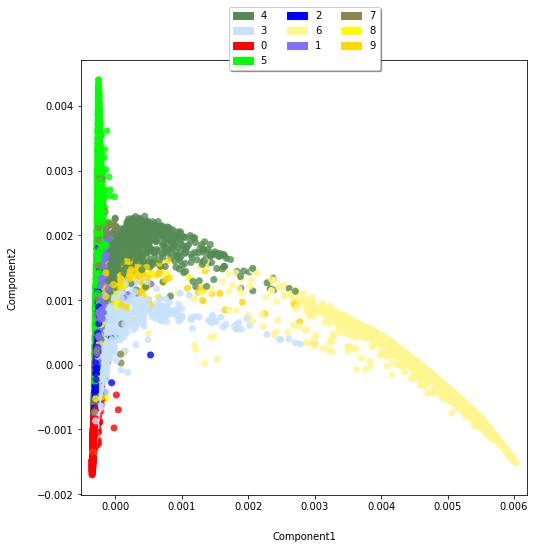

In [10]:
st.plot_dimension_reduction(adata)

In [11]:
st.seed_elastic_principal_graph(adata,n_clusters=10)

Seeding initial elastic principal graph...
Clustering...
K-Means clustering ...
The number of initial nodes is 10
Calculatng minimum spanning tree...
Number of initial branches: 3


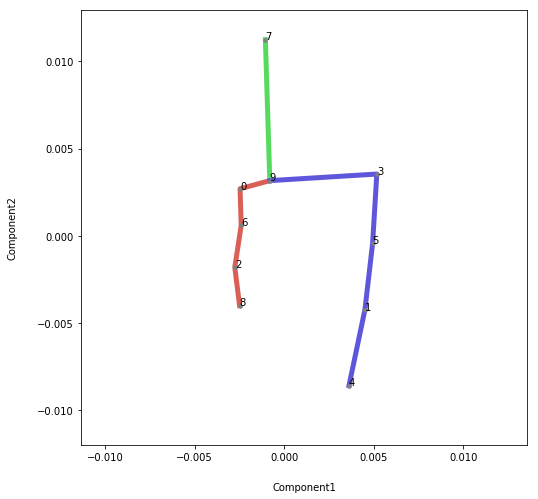

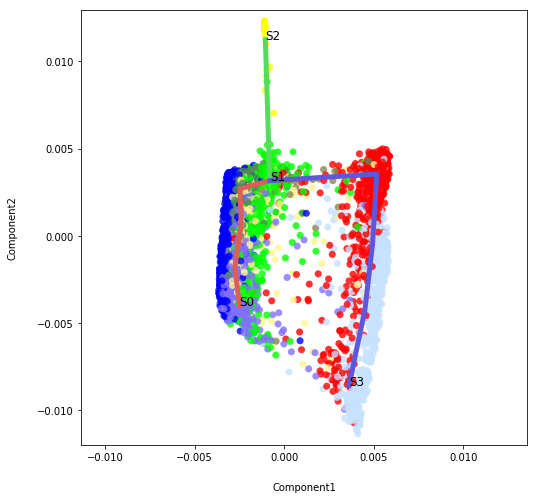

In [17]:
st.plot_branches(adata)
st.plot_branches_with_cells(adata,fig_legend=False)

In [13]:
st.elastic_principal_graph(adata,epg_alpha=0.02,epg_mu=0.1,epg_lambda=0.02)

Learning elastic principal graph...
[1]
 "Constructing tree 1 of 1 / Subset 1 of 1"


[1]
 "Computing EPG with 50 nodes on 43647 points and 2 dimensions"


[1]
 "Using a single core"


Nodes = 
10
 
11
 
12
 
13
 
14
 
15
 
16
 
17
 
18
 
19
 
20
 
21
 
22
 
23
 
24
 
25
 
26
 
27
 
28
 
29
 
30
 
31
 
32
 
33
 
34
 
35
 
36
 
37
 
38
 
39
 
40
 
41
 
42
 
43
 
44
 
45
 
46
 
47
 
48
 
49
 


BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

1||50
	
6.345e-08
	
50
	
49
	
46
	
1
	
0
	
0
	
1.608e-08
	
1.322e-08
	
0.9933
	
0.9945
	
4.545e-08
	
1.912e-09
	
9.559e-08
	
4.78e-06
	
0


315.404 sec elapsed

[[1]]



Number of branches after learning elastic principal graph: 3


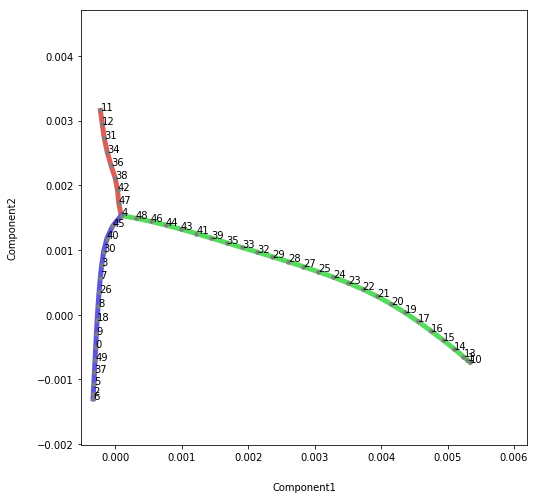

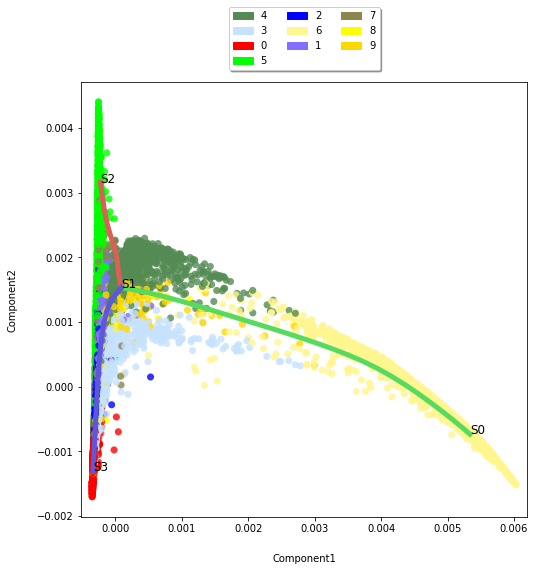

In [14]:
st.plot_branches(adata)
st.plot_branches_with_cells(adata)

Optimizing branching...
[1]
 "Constructing tree 1 of 1 / Subset 1 of 1"


[1]
 "Computing EPG with 80 nodes on 43647 points and 2 dimensions"


[1]
 "Using a single core"


Nodes = 
50
 
51
 
52
 
53
 
54
 
55
 
56
 
57
 
58
 
59
 
60
 
61
 
62
 
63
 
64
 
65
 
66
 
67
 
68
 
69
 
70
 
71
 
72
 
73
 
74
 
75
 
76
 
77
 
78
 
79
 


BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

1||80
	
2.675e-08
	
80
	
79
	
76
	
1
	
0
	
0
	
9.059e-09
	
7.251e-09
	
0.9962
	
0.997
	
1.667e-08
	
1.023e-09
	
8.181e-08
	
6.545e-06
	
0


64.233 sec elapsed

Number of branches after optimizing branching: 3


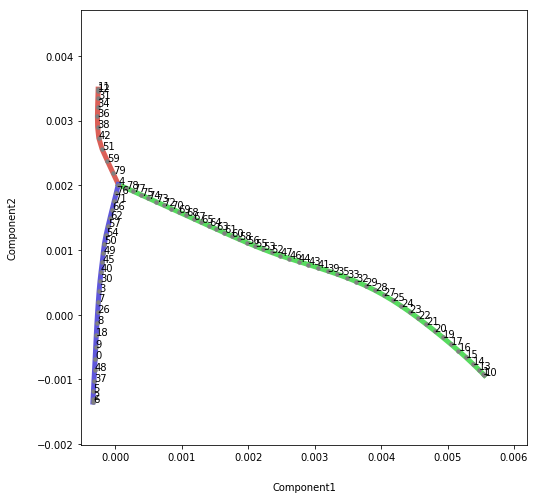

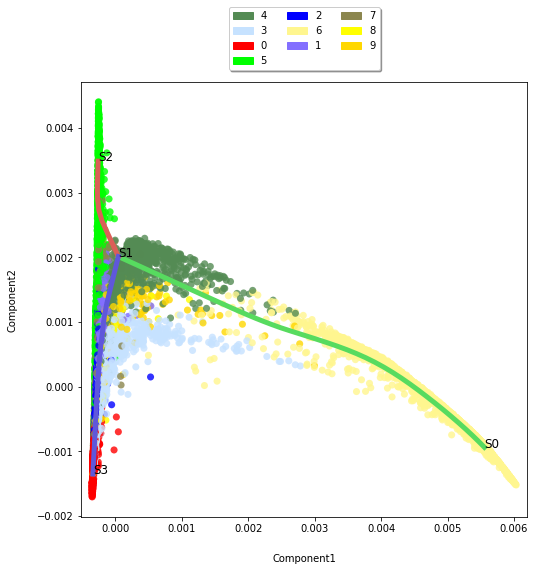

In [15]:
st.optimize_branching(adata,epg_alpha=0.02,epg_mu=0.1,epg_lambda=0.01)
st.plot_branches(adata)
st.plot_branches_with_cells(adata)

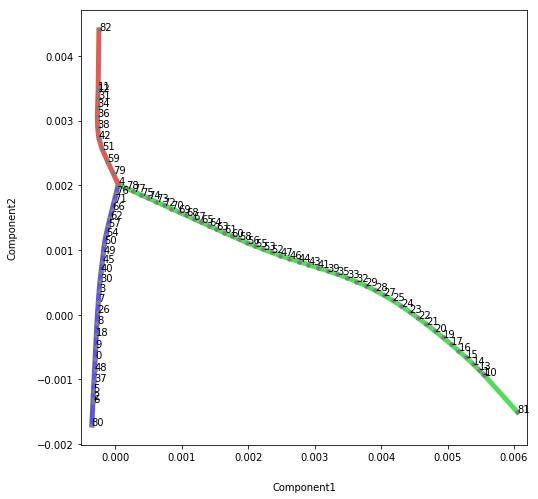

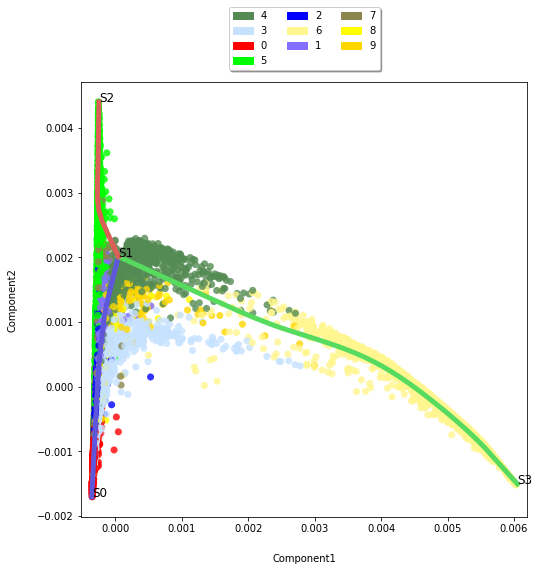

In [18]:
###Extend leaf branch to reach further cells 
st.extend_elastic_principal_graph(adata)
st.plot_branches(adata)
st.plot_branches_with_cells(adata)

/home/ye/anaconda3/envs/Stream/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


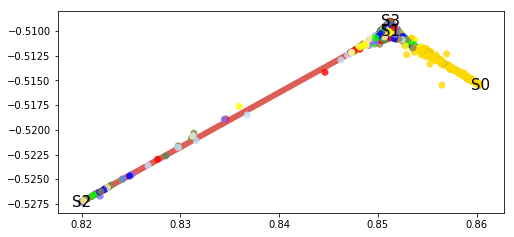

In [15]:
st.plot_flat_tree(adata,fig_legend=False)

In [3]:
adata=st.read("stream_result/vkh_BC/adata_stream.pkl",file_format="pkl",workdir="stream_result/vkh_BC")
#st.write(adata,file_name="adata_stream.pkl")

Saving results in: stream_result/vkh_BC


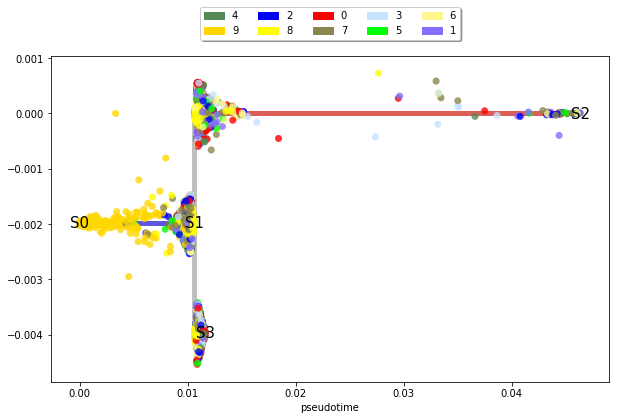

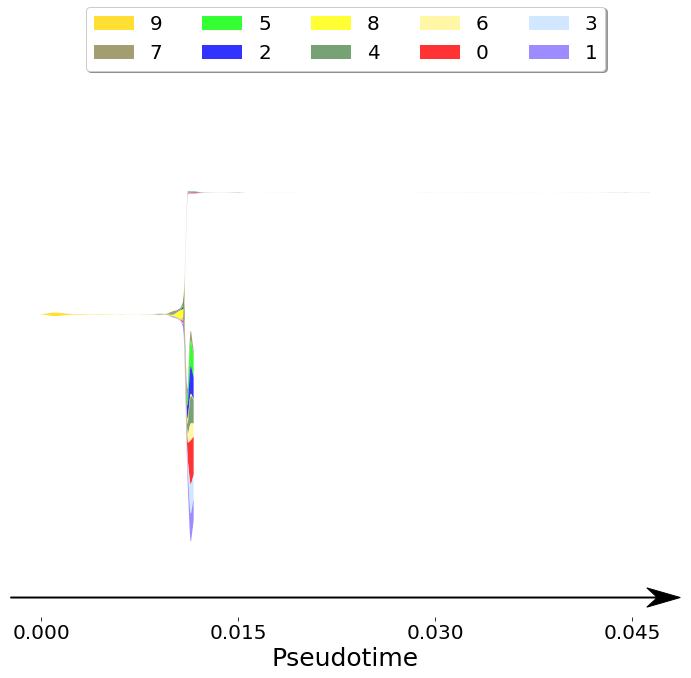

In [4]:
st.subwaymap_plot(adata,root='S0',fig_legend_ncol=5,percentile_dist=100) 
st.stream_plot(adata,root='S0',fig_legend_ncol=5,fig_size=(12,12))

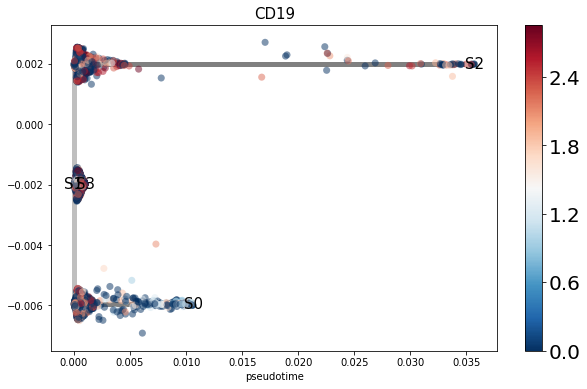

In [6]:
subwaymap_plot_gene(adata,percentile_dist=100,root='S1',genes=["CD19"])  # motified by myself

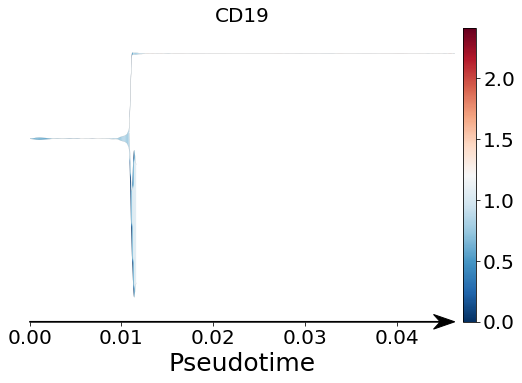

In [8]:
#st.write(adata,file_name='stream_result.pkl')
stream_plot_gene(adata,root='S0',fig_size=(8,8),genes=['CD19'])

In [25]:
detect_transistion_genes(adata,root='S0')

Filtering out genes that are expressed in less than 5 cells ...
1 cpus are being used ...


error: 'i' format requires -2147483648 <= number <= 2147483647

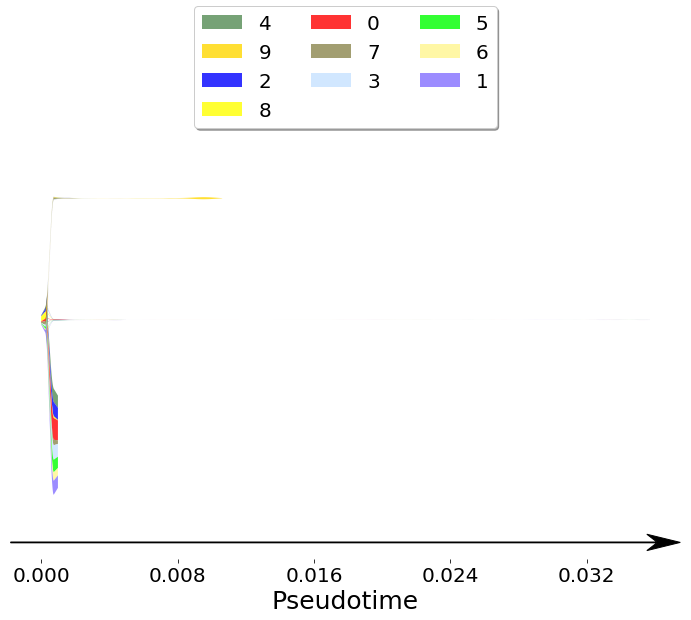

In [9]:
st.stream_plot(adata,root='S1',preference=['S0'],factor_min_win=1.5)

In [26]:
#from src.core import detect_de_genes,detect_leaf_genes
detect_leaf_genes(adata,root='S0',cutoff_zscore=1.0)

Filtering out genes that are expressed in less than 5 cells ...
1 cpus are being used ...


error: 'i' format requires -2147483648 <= number <= 2147483647

In [12]:
adata.uns['leaf_genes_all'].head()

,zscore,H_statistic,H_pvalue,S0S1_pvalue,S1S2_pvalue,S1S3_pvalue
ABCB9,1.41421,3530.05,0,1,0,0
IGF1,1.41421,1834.77,0,1,9.75393e-158,0
TRBV20-1,1.41421,1564.58,0,1,1.70879e-132,0
HRASLS2,1.41421,4190.89,0,1,0,0
PERP,1.41421,2461.17,0,1,9.87711e-219,0


In [30]:
detect_transistion_genes(adata,root='S0')

Importing precomputed scaled gene expression matrix ...
11801 genes are being scanned ...


In [33]:
#st.write(adata,file_name='stream_result.pkl')

In [11]:
adata.uns['transition_genes'][('S0','S1')].head()

,stat,logfc,pval,qval
TXNDC5,-0.764571,6.490773,2.583665e-261,3.244567e-257
MZB1,-0.757676,2.854651,5.942643e-254,3.731385e-250
CD37,0.743795,0.912895,7.412639e-240,3.102931e-236
HLA-DRA,0.735791,1.440204,3.886801e-232,1.220261e-228
HLA-DPB1,0.728947,1.433871,9.326902e-226,2.342545e-222


ValueError: min() arg is an empty sequence

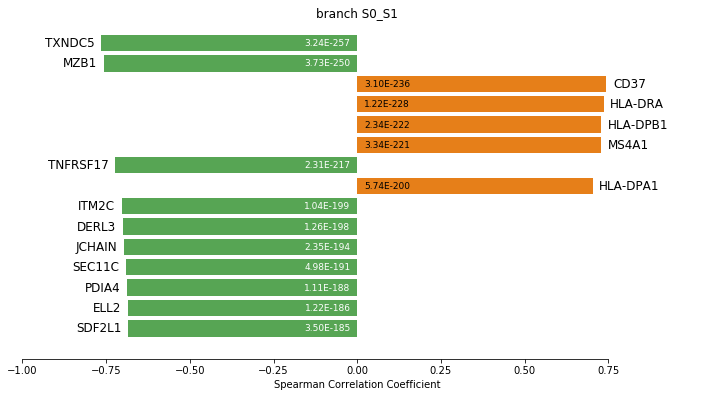

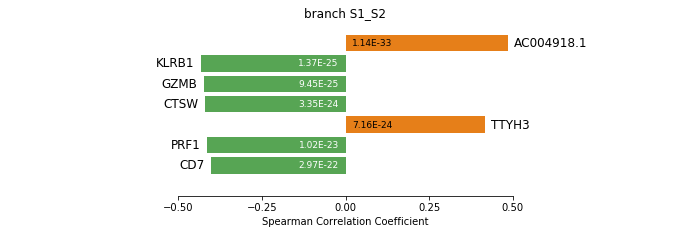

/home/ye/anaconda3/envs/Stream/lib/python3.7/site-packages/matplotlib/axis.py:1081: UserWarning: Unable to find pixel distance along axis for interval padding of ticks; assuming no interval padding needed.
  warnings.warn("Unable to find pixel distance along axis "
/home/ye/anaconda3/envs/Stream/lib/python3.7/site-packages/matplotlib/axis.py:1091: UserWarning: Unable to find pixel distance along axis for interval padding of ticks; assuming no interval padding needed.
  warnings.warn("Unable to find pixel distance along axis "


RuntimeError: libpng signaled error

<Figure size 864x0 with 1 Axes>

In [10]:
plot_transition_genes(adata,mi

In [37]:
detect_de_genes(adata,root='S1')

Importing precomputed scaled gene expression matrix ...
11801 genes are being scanned ...


In [13]:
adata.uns['de_genes_greater'].keys()

dict_keys([(('S0', 'S1'), ('S1', 'S2')), (('S0', 'S1'), ('S1', 'S3')), (('S1', 'S2'), ('S1', 'S3'))])